## MNIST (PCA + Logistic Regression)
ref: https://en.wikipedia.org/wiki/MNIST_database

* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand

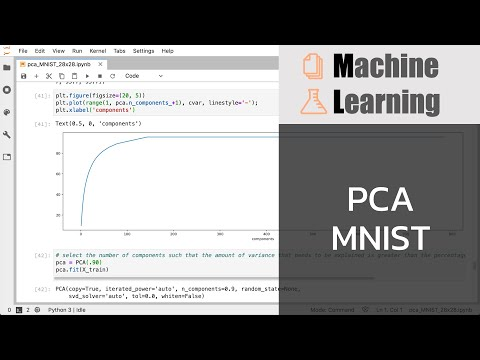

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('llZFHmni9QA', width=720, height=405)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# Thai font in chart
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13

# pandas display options
pd.set_option('display.max_rows', 10)

# pd.set_option('display.max_rows', None) # all rows
# pd.set_option('display.max_columns', None) # all columns
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

# numpy print options
np.set_printoptions(linewidth=1000)

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 0.25.3
numpy   version = 1.18.5
seaborn version = 0.10.1


In [4]:
pd.Timestamp.now()

Timestamp('2020-10-30 09:16:20.023057')

## read MNIST data

In [5]:
data_file='https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [6]:
M=df[df.columns[df.columns.str.startswith('pixel')]]
M

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
M=df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
print(f'M.shape = {M.shape}')
M

M.shape = (5000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
28*28

784

In [9]:
M[0].reshape(28, -1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  59, 229, 254, 255, 255, 254, 229, 105,  18,   0

In [10]:
print(M[0].reshape(28, -1))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2  59 229 254 255 255 254 229 105  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  90 253 253 253 253 253 253 253 253 150   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  39 226 252 165 133  32 118 149 252 253 250 16

In [11]:
np.set_printoptions(linewidth=1000)

In [12]:
print(M[0].reshape(28, -1))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2  59 229 254 255 255 254 229 105  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  90 253 253 253 253 253 253 253 253 150   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  39 226 252 165 133  32 118 149 252 253 250 16

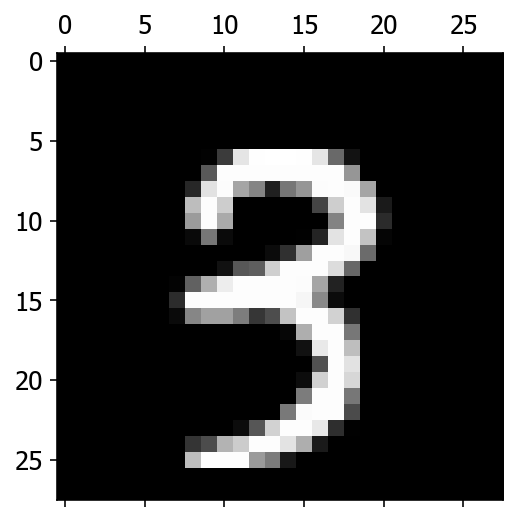

In [13]:
plt.matshow(M[0].reshape(28, -1), cmap='gray')

matplotlib cmap(colormap) ref: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

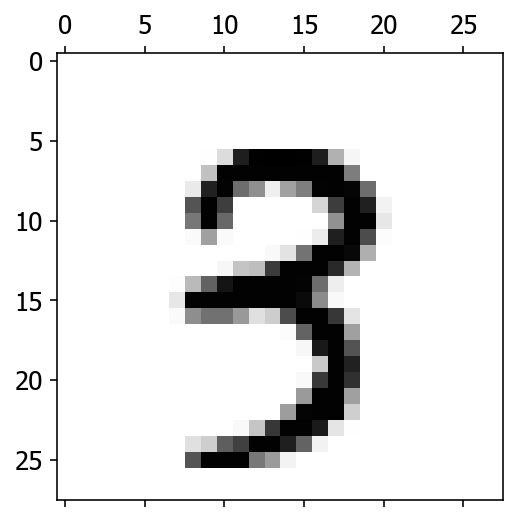

In [14]:
plt.matshow(M[0].reshape(28, -1), cmap='Greys')

<AxesSubplot:>

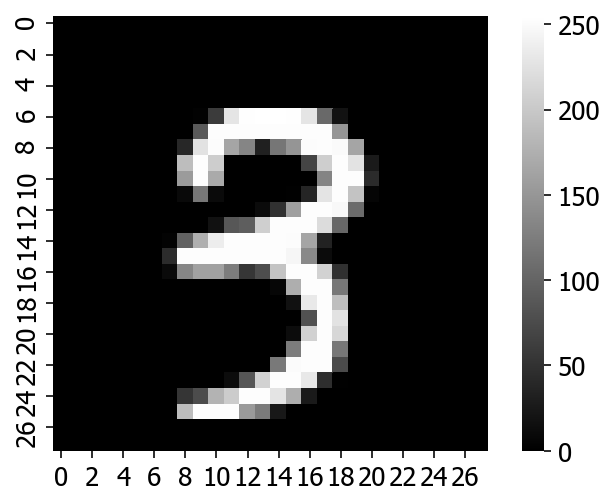

In [15]:
sns.heatmap(M[0].reshape(28, -1), cmap='gray', square=True)

In [16]:
df['class'][:10]

0    3
1    3
2    1
3    1
4    3
5    9
6    1
7    4
8    2
9    4
Name: class, dtype: int64

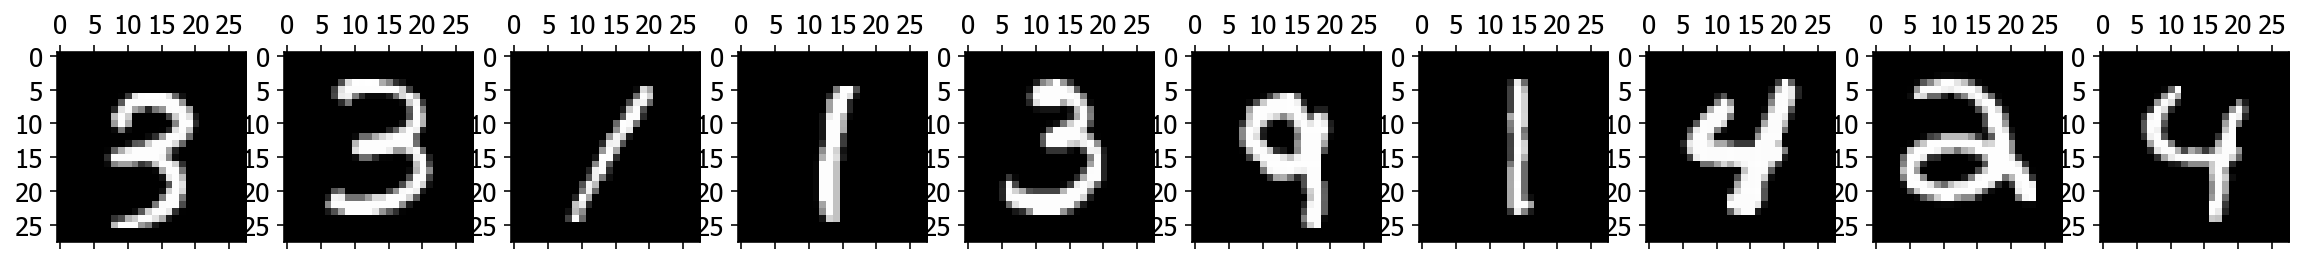

In [17]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(M[i].reshape(28, -1), cmap='gray') for i in range(n)];

# sklearn

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [19]:
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7, stratify=y)

In [20]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression (without dimension reduction)

In [21]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [22]:
model = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=1000)
# model = RandomForestClassifier(max_depth=10)
model.fit(X_train_t, y_train)

LogisticRegression(max_iter=1000)

In [23]:
model.score(X_train_t, y_train)

1.0

In [24]:
model.score(X_test_t, y_test)

0.892

In [25]:
predicted = model.predict(X_test_t)
predicted

array([7, 6, 1, 0, 7, 1, 5, 2, 4, 6, 4, 4, 9, 6, 3, 0, 9, 8, 4, 2, 7, 2, 2, 4, 9, 0, 7, 8, 0, 1, 3, 1, 9, 7, 9, 3, 8, 5, 5, 3, 8, 7, 4, 2, 8, 6, 1, 0, 3, 2, 3, 1, 2, 4, 0, 2, 2, 7, 8, 2, 3, 7, 4, 2, 3, 9, 2, 4, 3, 1, 0, 0, 3, 2, 9, 4, 1, 8, 3, 1, 8, 1, 3, 6, 6, 3, 4, 3, 9, 7, 3, 9, 7, 2, 8, 2, 7, 1, 0, 1, 1, 8, 0, 8, 0, 0, 5, 6, 5, 0, 5, 6, 5, 7, 2, 6, 2, 3, 4, 7, 4, 9, 3, 5, 6, 4, 8, 6, 5, 9, 4, 6, 0, 7, 2, 6, 1, 0, 6, 7, 4, 9, 0, 6, 8, 6, 5, 7, 4, 4, 7, 1, 4, 1, 4, 3, 7, 1, 7, 1, 6, 2, 1, 2, 7, 4, 1, 1, 9, 7, 8, 7, 5, 1, 5, 9, 1, 2, 2, 7, 6, 8, 9, 4, 2, 2, 4, 2, 7, 5, 3, 1, 3, 6, 6, 7, 5, 4, 4, 6, 1, 1, 6, 7, 5, 7, 9, 1, 7, 4, 1, 5, 0, 9, 1, 6, 4, 9, 6, 3, 0, 5, 4, 0, 9, 6, 6, 6, 3, 0, 9, 0, 8, 5, 1, 1, 3, 7, 6, 5, 7, 3, 1, 5, 1, 0, 4, 8, 0, 2, 8, 6, 6, 2, 7, 4, 2, 6, 3, 4, 7, 0, 2, 6, 3, 1, 4, 8, 4, 0, 8, 7, 2, 6, 5, 4, 4, 5, 1, 9, 2, 5, 8, 8, 1, 7, 8, 0, 4, 1, 1, 1, 1, 0, 9, 1, 2, 1, 5, 0, 7, 7, 4, 0, 4, 1, 2, 5, 1, 8, 5, 3, 9, 2, 6, 6, 4, 8, 7, 8, 1, 8, 9, 1, 1, 9, 1, 2, 2, 5, 6,


In [26]:
cm=metrics.confusion_matrix(y_test, predicted)
cm

array([[ 86,   0,   1,   0,   0,   2,   2,   0,   1,   0],
       [  0, 118,   1,   0,   0,   0,   1,   0,   0,   1],
       [  2,   1,  92,   2,   1,   0,   1,   4,   0,   1],
       [  0,   1,   1,  93,   0,   7,   1,   0,   1,   0],
       [  3,   1,   0,   0,  84,   0,   2,   1,   0,   1],
       [  2,   1,   2,   3,   2,  77,   1,   0,   2,   2],
       [  4,   0,   4,   0,   2,   2,  84,   0,   1,   0],
       [  0,   0,   4,   5,   2,   0,   0,  94,   1,   0],
       [  0,   2,   4,   3,   1,   5,   0,   0,  70,   1],
       [  0,   0,   0,   2,   6,   0,   0,   4,   0,  94]], dtype=int64)

In [27]:
y_test.value_counts().sort_index()

0     92
1    121
2    104
3    104
4     92
5     92
6     97
7    106
8     86
9    106
Name: class, dtype: int64

In [28]:
pd.crosstab(y_test, predicted, margins='All')

col_0,0,1,2,3,4,5,6,7,8,9,All
class,,,,,,,,,,,
0,86,0,1,0,0,2,2,0,1,0,92
1,0,118,1,0,0,0,1,0,0,1,121
2,2,1,92,2,1,0,1,4,0,1,104
3,0,1,1,93,0,7,1,0,1,0,104
4,3,1,0,0,84,0,2,1,0,1,92
...,...,...,...,...,...,...,...,...,...,...,...
6,4,0,4,0,2,2,84,0,1,0,97
7,0,0,4,5,2,0,0,94,1,0,106
8,0,2,4,3,1,5,0,0,70,1,86


In [29]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        92
           1       0.95      0.98      0.96       121
           2       0.84      0.88      0.86       104
           3       0.86      0.89      0.88       104
           4       0.86      0.91      0.88        92
           5       0.83      0.84      0.83        92
           6       0.91      0.87      0.89        97
           7       0.91      0.89      0.90       106
           8       0.92      0.81      0.86        86
           9       0.94      0.89      0.91       106

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



### precision

In [30]:
86/97

0.8865979381443299

In [31]:
cm[0, 0] / cm[:, 0].sum()

0.8865979381443299

In [32]:
118/124

0.9516129032258065

In [33]:
cm[1, 1] / cm[:, 1].sum()

0.9516129032258065

### recall

In [34]:
cm[0, 0] / cm[0].sum()

0.9347826086956522

In [35]:
cm[1, 1] / cm[1].sum()

0.9752066115702479

## PCA

In [36]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [37]:
X_train.shape

(4000, 784)

In [38]:
pca=PCA(n_components=X_train.shape[1])

In [39]:
X_new = pca.fit_transform(X) # Fit the model with X and apply the dimensionality reduction on X.
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_.round(4)}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_):.4f}')

explained_variance_ratio (n_components=784) = [0.0977 0.072  0.0617 0.0543 0.0476 0.0423 0.0328 0.0291 0.028  0.0234 0.0213 0.0201 0.0173 0.0168 0.0158 0.0149 0.0133 0.0129 0.0122 0.0116 0.0107 0.0103 0.0096 0.0093 0.0089 0.0086 0.0081 0.0078 0.0075 0.007  0.0067 0.0065 0.0061 0.0057 0.0056 0.0052 0.0051 0.005  0.0049 0.0047 0.0045 0.0043 0.0042 0.0041 0.0039 0.0038 0.0036 0.0034 0.0034 0.0033 0.0032 0.0031 0.003  0.003  0.0028 0.0027 0.0027 0.0026 0.0026 0.0025 0.0024 0.0023 0.0023 0.0022 0.0021 0.0021 0.002  0.0019 0.0019 0.0019 0.0019 0.0018 0.0018 0.0017 0.0017 0.0016 0.0016 0.0016 0.0015 0.0015 0.0014 0.0014 0.0014 0.0014 0.0014 0.0013 0.0013 0.0013 0.0013 0.0012 0.0012 0.0012 0.0011 0.0011 0.0011 0.0011 0.001  0.001  0.001  0.001  0.001  0.001  0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0

In [40]:
pca.explained_variance_.round(3) # Eigenvalues

array([3.32246871e+05, 2.44998191e+05, 2.10036478e+05, 1.84662077e+05, 1.61857555e+05, 1.43899112e+05, 1.11439095e+05, 9.90995980e+04, 9.53339400e+04, 7.95626800e+04, 7.23006650e+04, 6.85517600e+04, 5.88202390e+04, 5.72655050e+04, 5.36500570e+04, 5.08293230e+04, 4.53526600e+04, 4.40215480e+04, 4.14127360e+04, 3.93212680e+04, 3.62978830e+04, 3.49350290e+04, 3.27570600e+04, 3.15661890e+04, 3.02712050e+04, 2.91966870e+04, 2.75587370e+04, 2.66545060e+04, 2.53770010e+04, 2.39594880e+04, 2.27940690e+04, 2.20375270e+04, 2.06782770e+04, 1.95439460e+04, 1.91416440e+04, 1.77687830e+04, 1.74037470e+04, 1.69975120e+04, 1.65761220e+04, 1.59395170e+04, 1.52188500e+04, 1.47210470e+04, 1.42236200e+04, 1.40413760e+04, 1.32812310e+04, 1.28066600e+04, 1.22985040e+04, 1.16439760e+04, 1.14603460e+04, 1.11794020e+04, 1.08078250e+04, 1.06969490e+04, 1.01230140e+04, 1.01043740e+04, 9.43527900e+03, 9.31211900e+03, 9.17286500e+03, 8.84006900e+03, 8.79995100e+03, 8.54740200e+03, 8.20269300e+03, 7.79711600e+03,
 

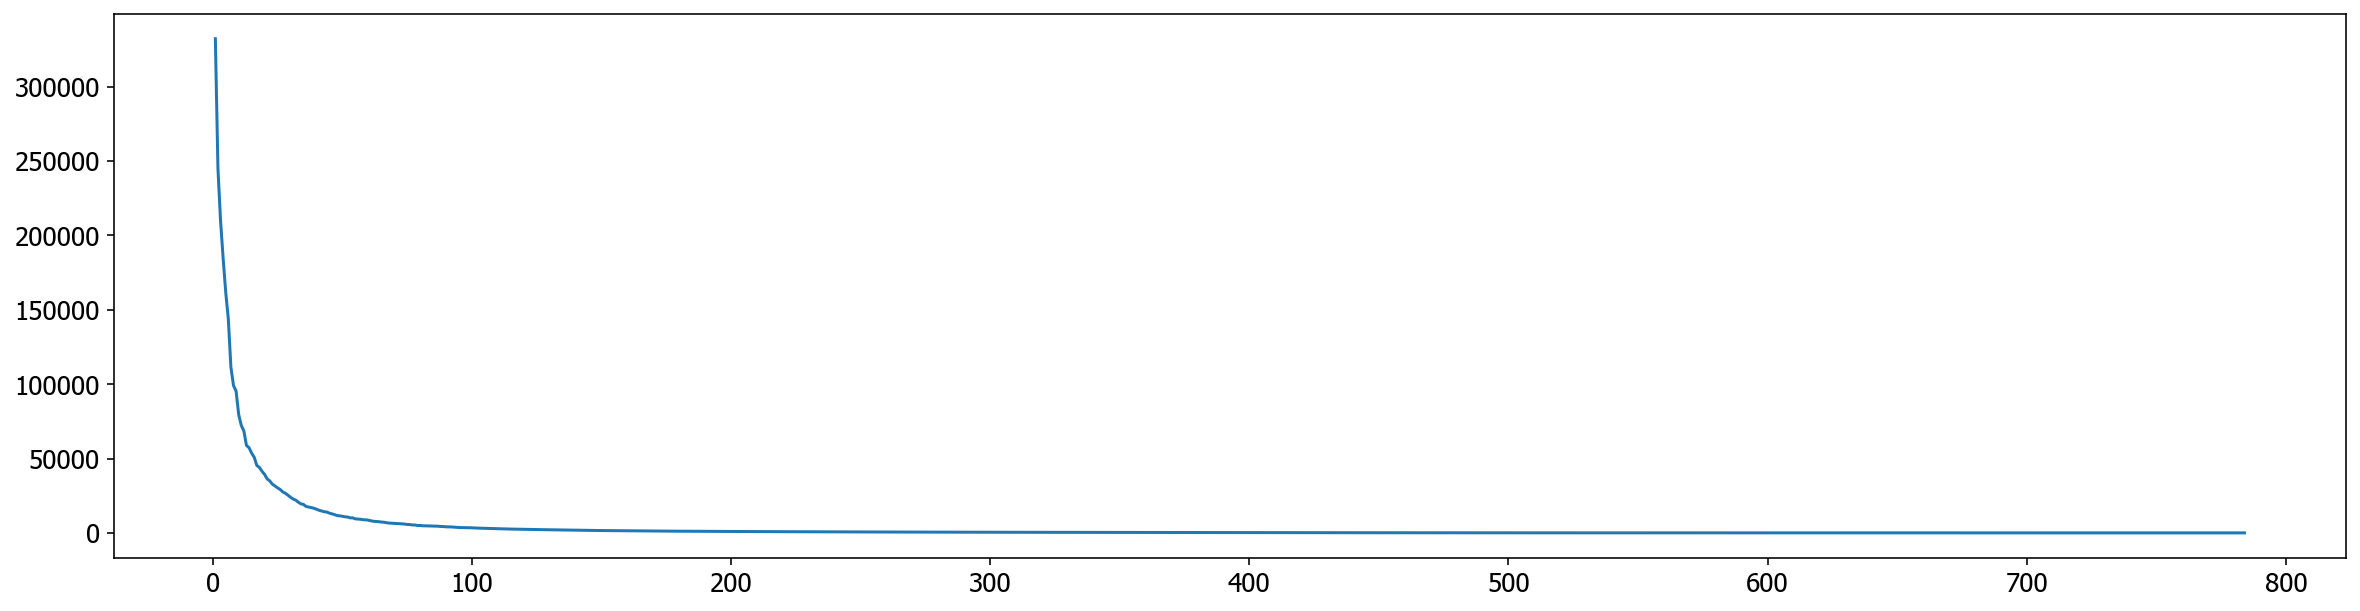

In [41]:
plt.figure(figsize=(20, 5))
# plt.plot(range(1, pca.n_components_+1), pca.explained_variance_, '--o')
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_, linestyle='-')

In [42]:
# cvar = cumulative proportion of var explained
cvar=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
cvar #cumulative sum of variance explained with [n] features

array([ 9.8, 17. , 23.2, 28.6, 33.4, 37.6, 40.9, 43.8, 46.6, 48.9, 51. , 53. , 54.7, 56.4, 58. , 59.5, 60.8, 62.1, 63.3, 64.5, 65.6, 66.6, 67.6, 68.5, 69.4, 70.3, 71.1, 71.9, 72.6, 73.3, 74. , 74.6, 75.2, 75.8, 76.4, 76.9, 77.4, 77.9, 78.4, 78.9, 79.3, 79.7, 80.1, 80.5, 80.9, 81.3, 81.7, 82. , 82.3, 82.6, 82.9, 83.2, 83.5, 83.8, 84.1, 84.4, 84.7, 85. , 85.3, 85.6, 85.8, 86. , 86.2, 86.4, 86.6, 86.8, 87. , 87.2, 87.4, 87.6, 87.8, 88. , 88.2, 88.4, 88.6, 88.8, 89. , 89.2, 89.3, 89.4, 89.5, 89.6, 89.7, 89.8, 89.9, 90. , 90.1, 90.2, 90.3, 90.4, 90.5, 90.6, 90.7, 90.8, 90.9, 91. , 91.1, 91.2, 91.3, 91.4, 91.5, 91.6, 91.7, 91.8, 91.9, 92. , 92.1, 92.2, 92.3, 92.4, 92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5, 93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7,
   

Text(0.5, 0, 'components')

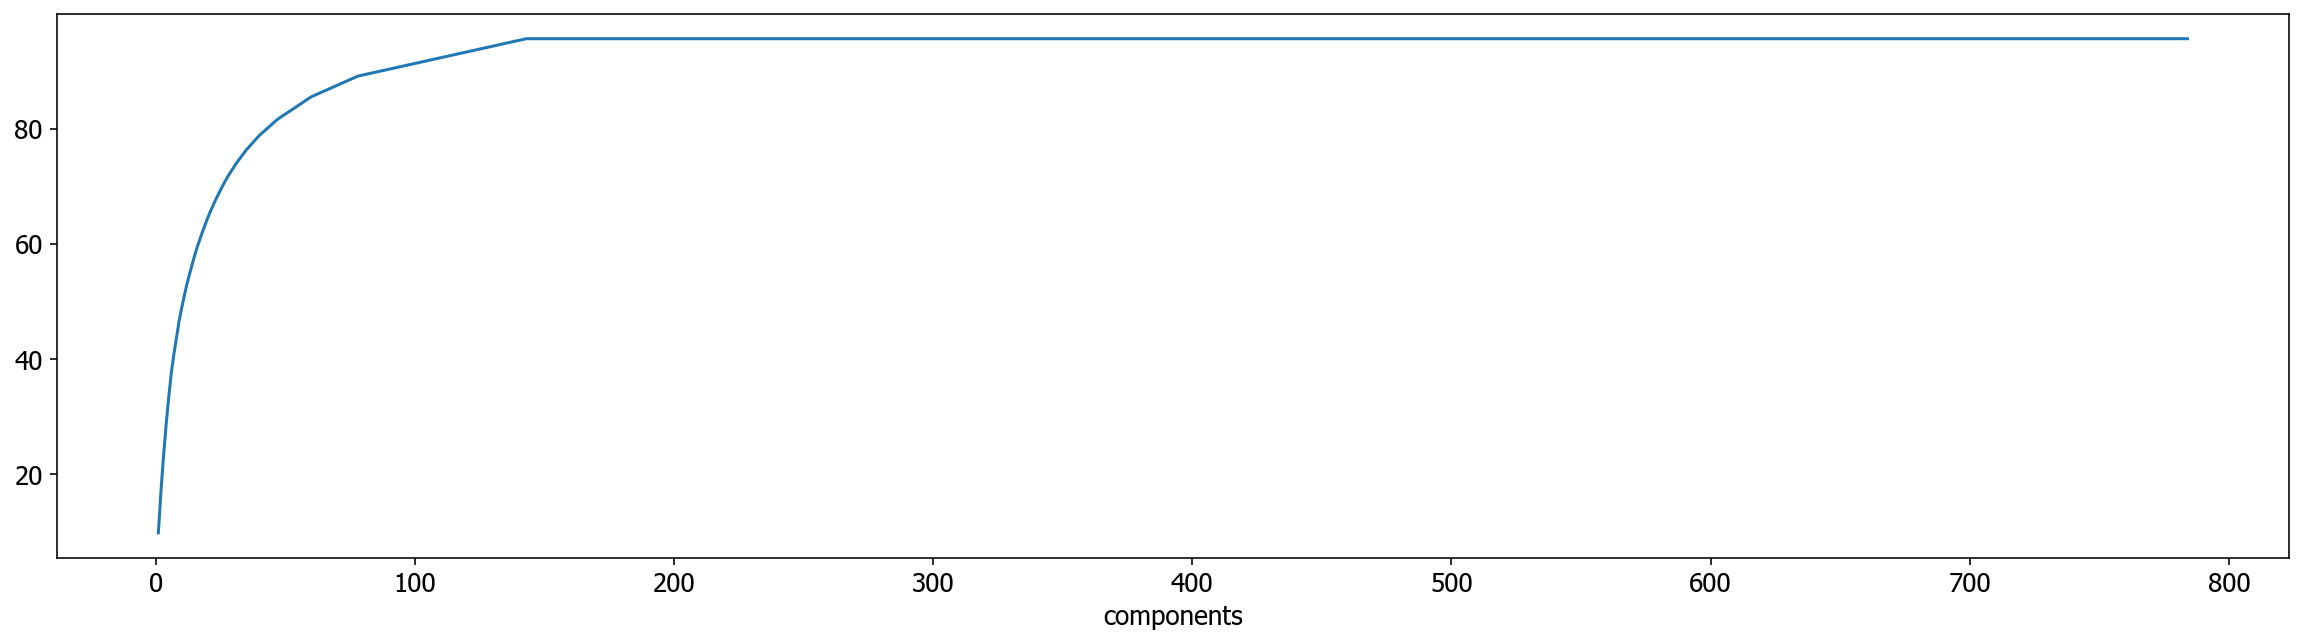

In [43]:
plt.figure(figsize=(20, 5))
plt.plot(range(1, pca.n_components_+1), cvar, linestyle='-');
plt.xlabel('components')

In [44]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)
                            

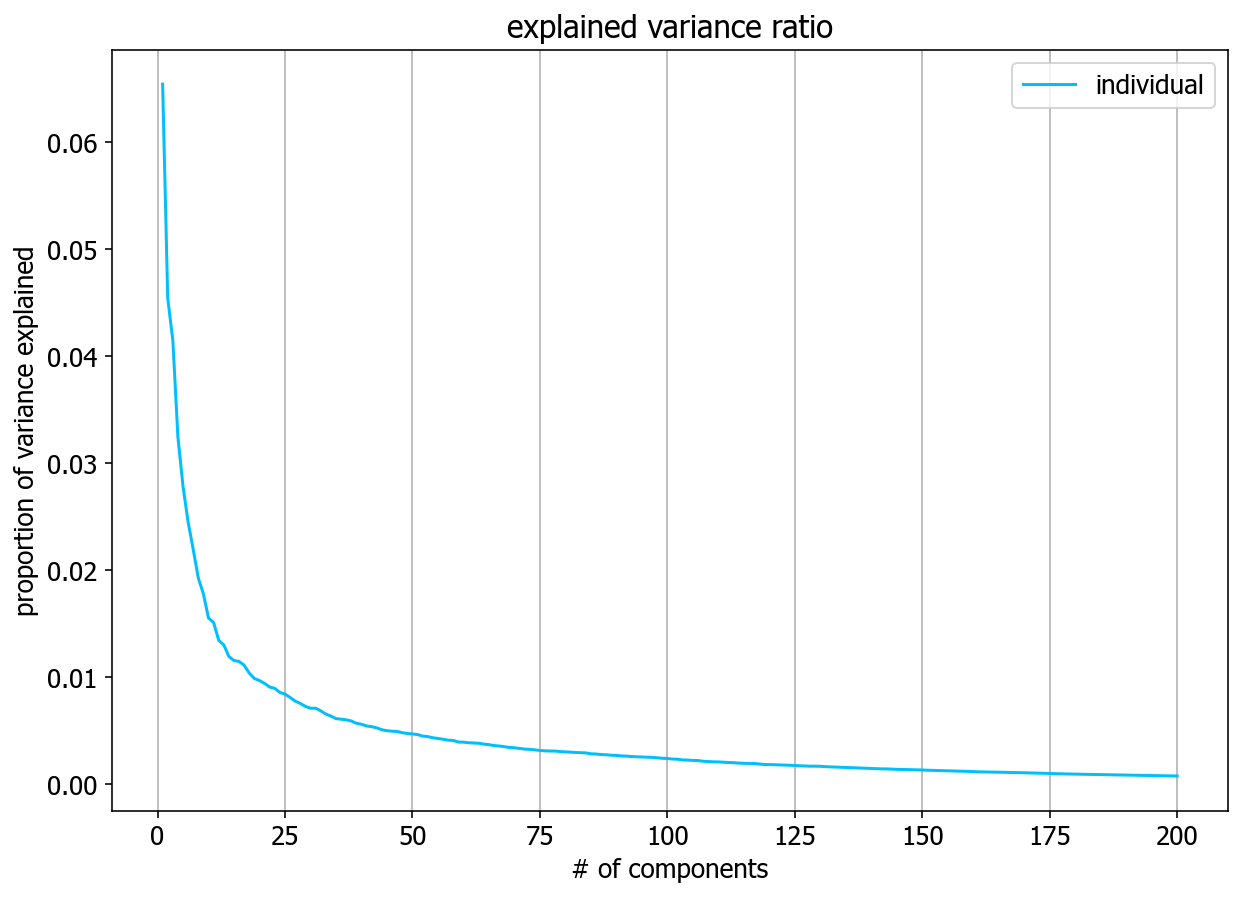

In [45]:
scree_plot(X_train, 200, False, False)

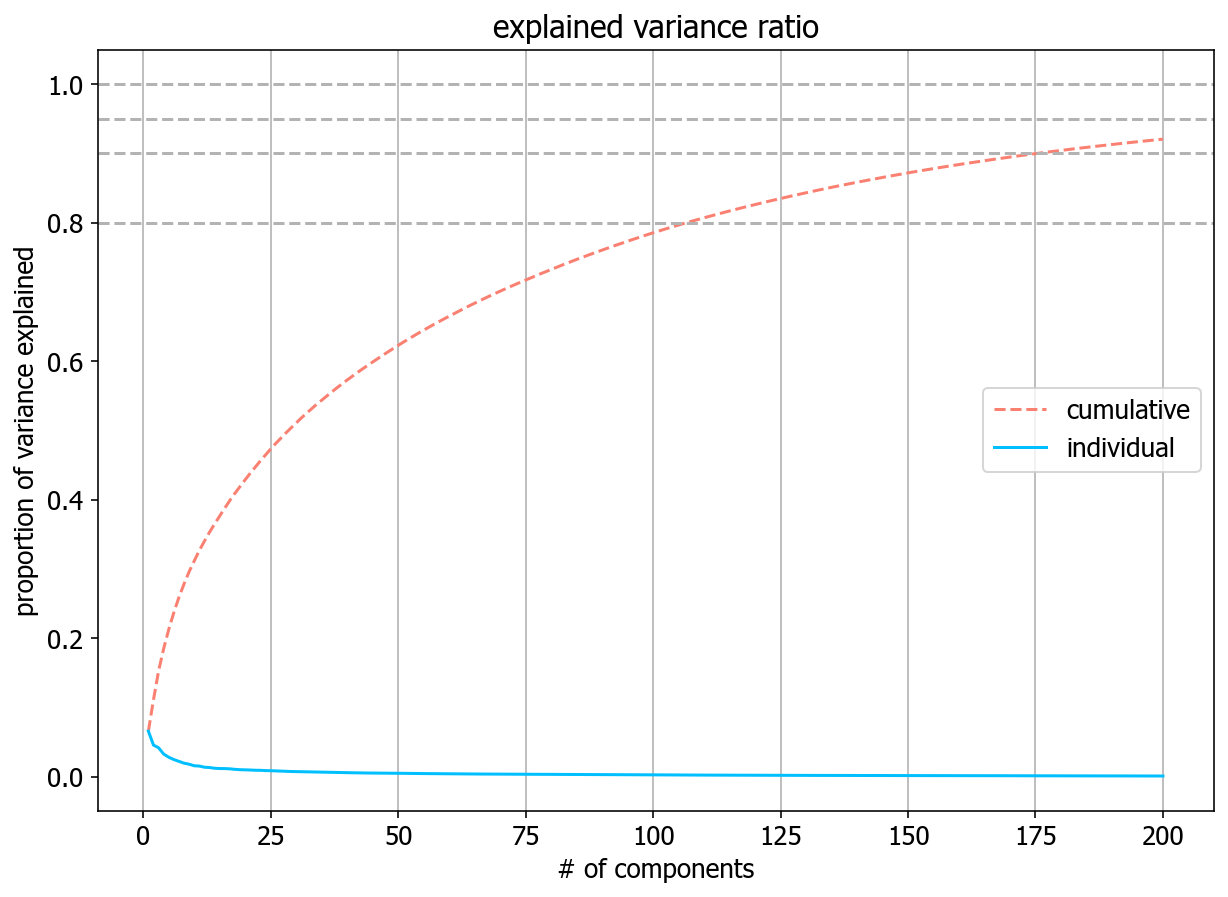

In [46]:
scree_plot(X_train, 200, True, False)

In [47]:
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(.90)
# pca = PCA(n_components=85)
pca.fit(X_train)

PCA(n_components=0.9)

In [48]:
pca.n_components_

85

In [49]:
X_train_t = pca.transform(X_train)
X_test_t = pca.transform(X_test)

In [50]:
X_train.shape

(4000, 784)

In [51]:
X_train_t.shape

(4000, 85)

---
# เปรียบเทียบจำนวน n_components ของ PCA

In [52]:
# df=pd.read_csv('mnist_28x28_2000rows.csv')
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip')
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [53]:
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [54]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plain Logistic Regression

In [55]:
model = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=10000)
print(model)
model.fit(X_train, y_train)
print(f'accuracy (train) = {model.score(X_train, y_train):.4f}, accuracy (test) = {model.score(X_test, y_test):.4f}')

LogisticRegression(max_iter=10000)
accuracy (train) = 1.0000, accuracy (test) = 0.8760


### standardize data -> Logistic Regression 

In [56]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)
model = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=1000)
# model = SVC(gamma='auto')
# model = LinearSVC(max_iter=10000)
# model = GaussianNB()
model.fit(X_train_t, y_train)
print(f'accuracy (train) = {model.score(X_train_t, y_train):.4f}, accuracy (test) = {model.score(X_test_t, y_test):.4f}')

accuracy (train) = 1.0000, accuracy (test) = 0.8920


### reduce dimension with PCA

In [57]:
for n in [.8, .85, .9, .95]:
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform to both the training set and the test set.
    X_train_t = scaler.transform(X_train)
    X_test_t = scaler.transform(X_test)
    pca = PCA(n)
    pca.fit(X_train_t)
    X_train_pca = pca.transform(X_train_t)
    X_test_pca = pca.transform(X_test_t)
    model = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=1000)
#     model = SVC(gamma='auto')
#     model = LinearSVC(max_iter=10000)
    model.fit(X_train_pca, y_train)
    print(f'pca = {n:.2f}({pca.n_components_:3} components), accuracy (train) = {model.score(X_train_pca, y_train):.4f}, accuracy (test) = {model.score(X_test_pca, y_test):.4f}')

pca = 0.80(107 components), accuracy (train) = 0.9595, accuracy (test) = 0.8880
pca = 0.85(135 components), accuracy (train) = 0.9698, accuracy (test) = 0.8860
pca = 0.90(176 components), accuracy (train) = 0.9852, accuracy (test) = 0.8780
pca = 0.95(253 components), accuracy (train) = 0.9972, accuracy (test) = 0.8760


## bonus

### compare different components

In [58]:
def plot_varying_components(dfX, n_img=10, n_components=[10, 20, 30, 50, 100, 200, 300], img_shape=(28, 28)):
    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train=dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width)) for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component}, {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width)) for i in range(n_img)]


n_component = 10, (4000, 10)
n_component = 50, (4000, 50)
n_component = 100, (4000, 100)
n_component = 300, (4000, 300)


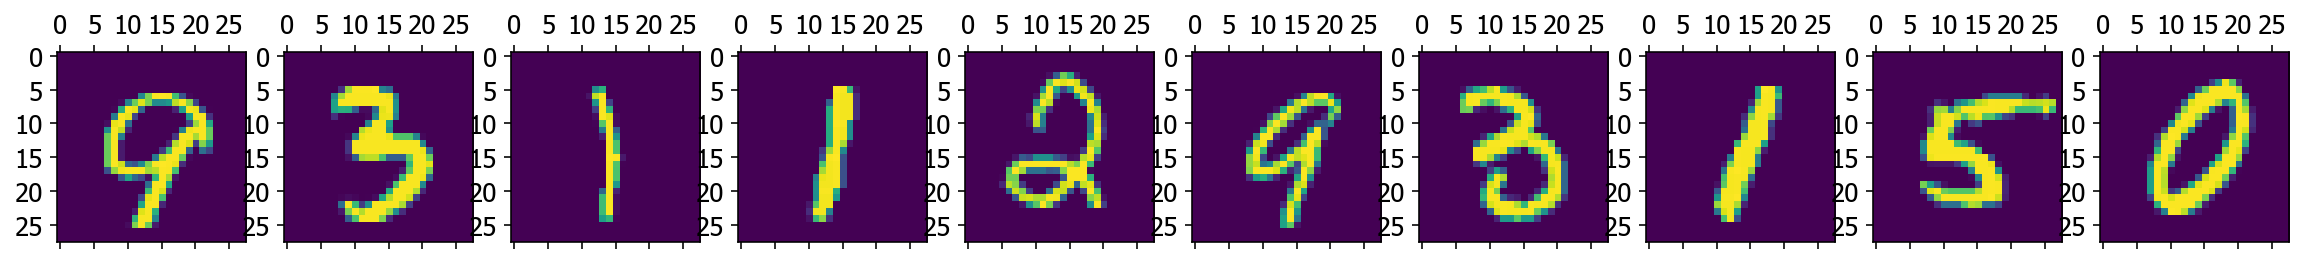

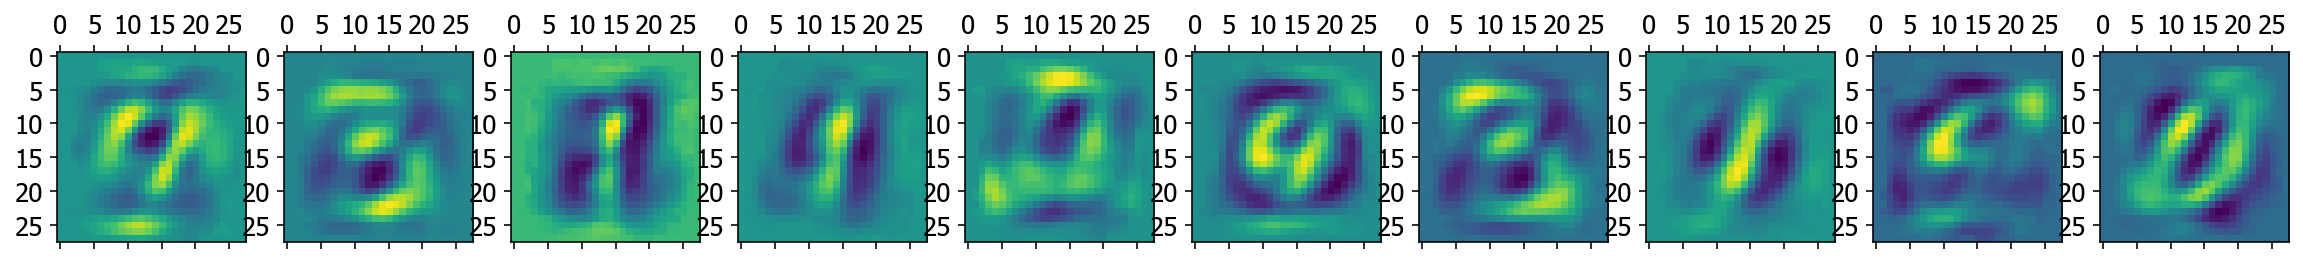

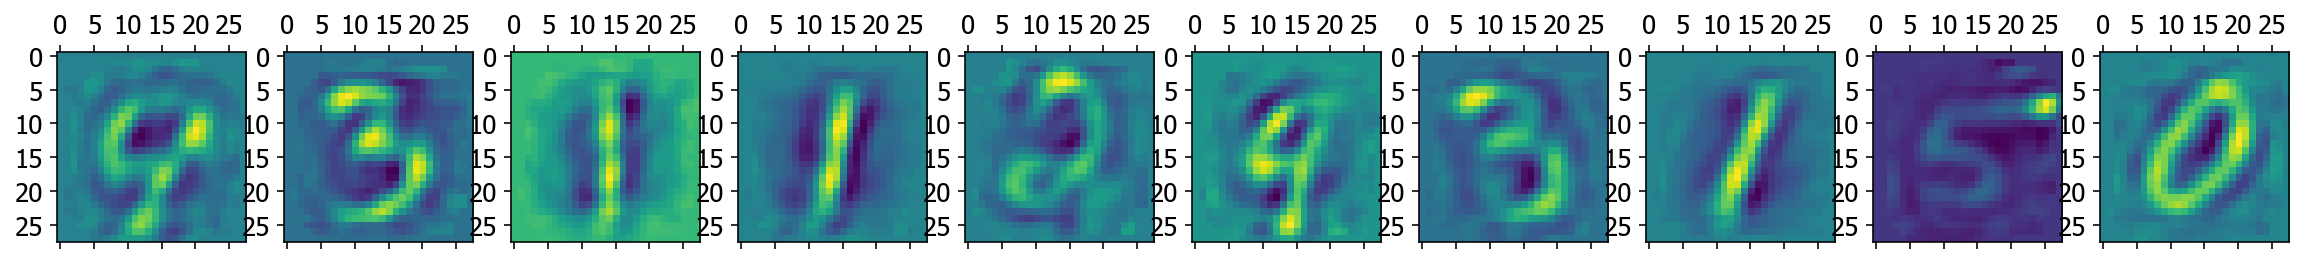

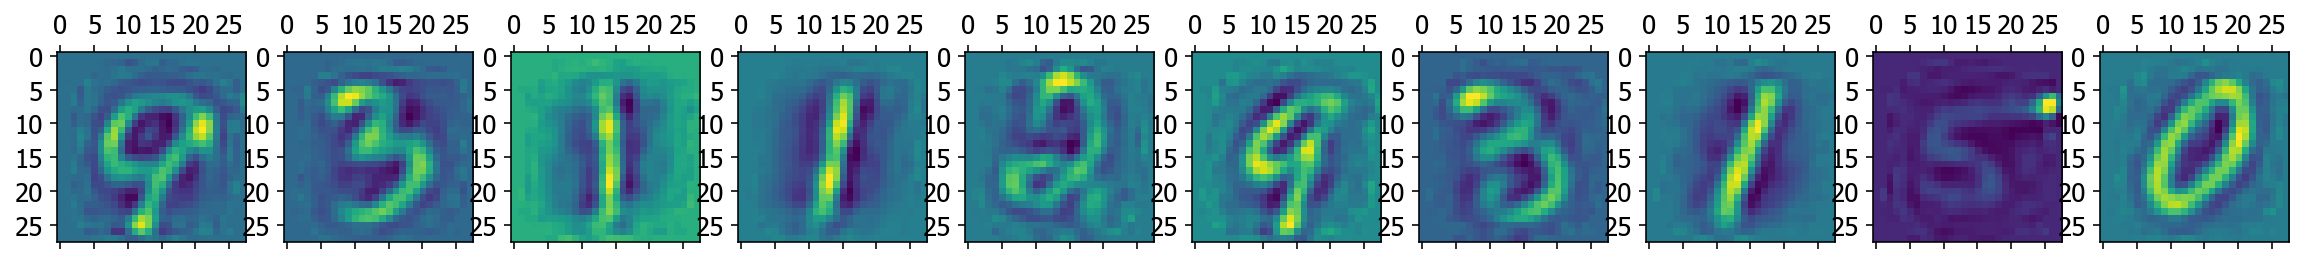

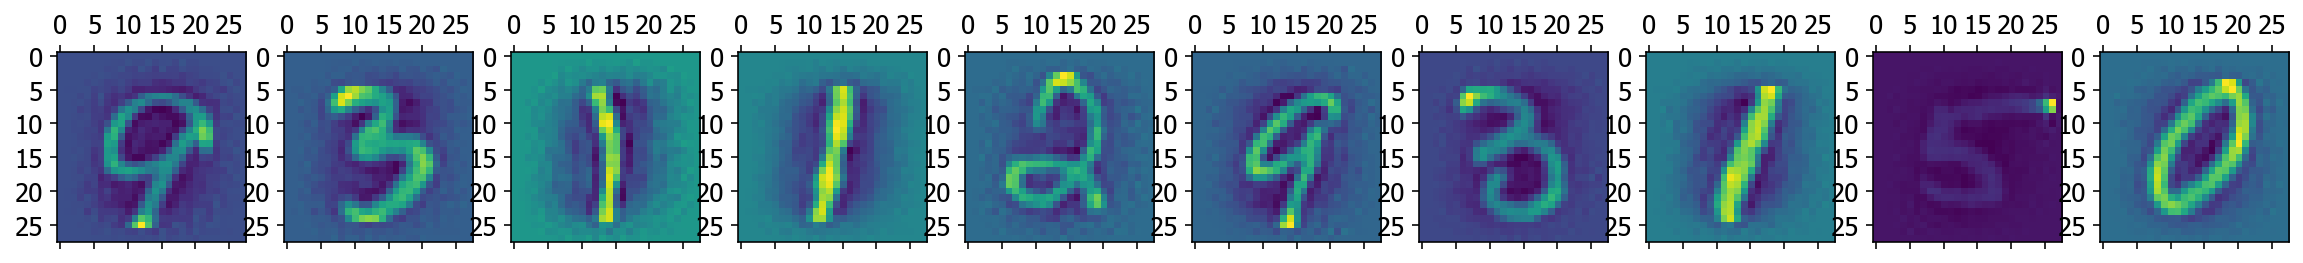

In [59]:
plot_varying_components(X_train, 10, [10, 50, 100, 300], (28, 28))
# plot_varying_compoents(X_train, [10, 50, 100, 200, 300])